In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [10]:
df.drop(columns=['show_id','title', 'cast', 'description'], inplace=True)

In [11]:
df.rename(columns={'listed_in' : 'category'}, inplace=True)

In [12]:
df.head()

,type,director,country,date_added,release_year,rating,duration,category
7,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,Theodore Melfi,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
24,Movie,S. Shankar,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [13]:
df.reset_index(drop=True)

,type,director,country,date_added,release_year,rating,duration,category
0,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,TV Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,Movie,Theodore Melfi,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
3,Movie,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
4,Movie,S. Shankar,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...,...
5327,Movie,Majid Al Ansari,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
5328,Movie,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
5329,Movie,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
5330,Movie,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          5332 non-null   object        
 1   director      5332 non-null   object        
 2   country       5332 non-null   object        
 3   date_added    5328 non-null   datetime64[ns]
 4   release_year  5332 non-null   int64         
 5   rating        5332 non-null   object        
 6   duration      5332 non-null   object        
 7   category      5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 374.9+ KB


In [16]:
types =  df['type'].value_counts()
types

type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [17]:
top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_movie

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,11
8,Don Michael Paul,10
9,David Dhawan,9


In [18]:
top_10_directors_TVShow = df['director'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_directors_TVShow

,director,count
0,Alastair Fothergill,3
1,Iginio Straffi,2
2,Rob Seidenglanz,2
3,Shin Won-ho,2
4,Stan Lathan,2
5,Simon Frederick,1
6,Daniel Minahan,1
7,Takuya Igarashi,1
8,Ally Pankiw,1
9,Jay Oliva,1


In [19]:
top_10_countries_movie = df['country'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_movie

,country,count
0,United States,1819
1,India,868
2,United Kingdom,164
3,Canada,104
4,Egypt,90
5,Nigeria,84
6,Spain,84
7,Indonesia,76
8,Turkey,74
9,Japan,73


In [20]:
top_10_countries_TVShow = df['country'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_TVShow

,country,count
0,United States,27
1,United Kingdom,19
2,Japan,10
3,South Korea,10
4,Spain,7
5,India,7
6,Taiwan,7
7,France,5
8,Turkey,5
9,Thailand,5


In [21]:
top_10_rating_movie = df['rating'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_rating_movie

,rating,count
0,TV-MA,1741
1,TV-14,1177
2,R,778
3,PG-13,470
4,TV-PG,416
5,PG,275
6,TV-G,81
7,TV-Y,71
8,TV-Y7,70
9,NR,58


In [22]:
top_10_rating_tvshow = df['rating'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_rating_tvshow

,rating,count
0,TV-MA,81
1,TV-14,37
2,TV-PG,15
3,TV-Y7,6
4,TV-Y,5
5,TV-G,3


In [23]:
top_10_category_moive = df['category'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_category_moive

,category,count
0,"Dramas, International Movies",336
1,Stand-Up Comedy,286
2,"Comedies, Dramas, International Movies",257
3,"Dramas, Independent Movies, International Movies",243
4,"Children & Family Movies, Comedies",179
5,"Dramas, International Movies, Romantic Movies",160
6,Documentaries,156
7,"Comedies, International Movies",152
8,"Comedies, International Movies, Romantic Movies",143
9,Dramas,133


In [24]:
top_10_category_tvshow = df['category'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_category_tvshow

,category,count
0,"Crime TV Shows, International TV Shows, TV Dramas",17
1,"International TV Shows, TV Dramas",6
2,"International TV Shows, Romantic TV Shows, TV ...",6
3,"Stand-Up Comedy & Talk Shows, TV Comedies",6
4,"Anime Series, International TV Shows",5
5,"Kids' TV, TV Comedies",5
6,"International TV Shows, Korean TV Shows, Roman...",5
7,TV Shows,5
8,"Crime TV Shows, International TV Shows, Spanis...",4
9,Kids' TV,4


In [25]:
df['date_added_year'] = df['date_added'].dt.year

In [26]:
df.head()

,type,director,country,date_added,release_year,rating,duration,category,date_added_year
7,Movie,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021.0
8,TV Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021.0
9,Movie,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021.0
12,Movie,Christian Schwochow,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021.0
24,Movie,S. Shankar,India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",2021.0


In [27]:
date_added =  df['date_added_year'].value_counts()
date_added

date_added_year
2019.0    1264
2020.0    1194
2018.0    1100
2021.0     755
2017.0     722
2016.0     202
2015.0      50
2014.0      14
2011.0      13
2013.0       7
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: count, dtype: int64

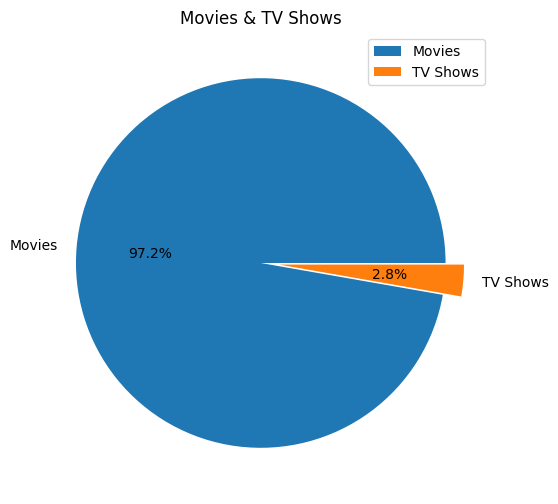

In [28]:
plt.figure(figsize=(10,6))
plt.pie(types ,labels=['Movies', 'TV Shows'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Movies & TV Shows')
plt.legend()
plt.show()

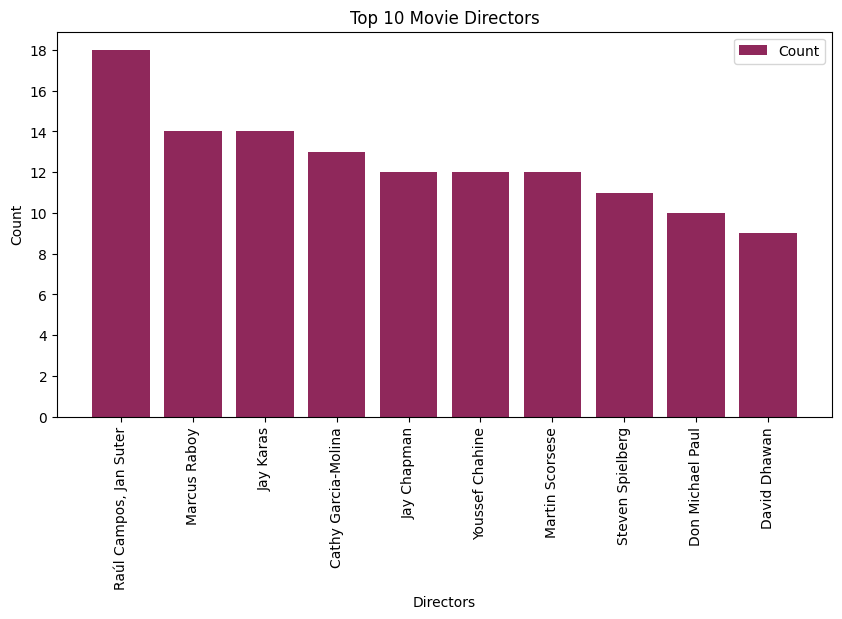

In [29]:
plt.figure(figsize=(10,5))
plt.bar(top_10_directors_movie['director'],top_10_directors_movie['count'], color = "#8f285b" , label='Count')
plt.title('Top 10 Movie Directors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()